Author: Sridhar Nerur
This notebook demonstrates how we can do some multivariate analysis - MDS and Hierarchical clustering - on text files. You will have to extract the data for each company from an excel file. The column"AB" contains the abstracts of patents for a given company. Let us get started.....

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import MDS
from scipy.cluster.hierarchy import ward, dendrogram

In [15]:
import pandas as pd #to read Excel files
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import string #to remove punctuation and digits
from glob import glob

stopwords = list(ENGLISH_STOP_WORDS)
p = string.punctuation
d = string.digits
combined = p + d

docs = [] #will contain text for all the companies
company_names = [] #will contain our labels

#simple function to parse our text
def parse(txt):
    txt = txt.lower()
    #remove punctuation and digits
    table = str.maketrans(combined, len(combined) * " ")
    txt = txt.translate(table)
    #remove stopwords
    words = txt.split()
    cleaned_words = [w for w in words if w not in stopwords]
    cleaned_text = " ".join(cleaned_words)
    return cleaned_text

files = glob("/Users/snerur/Dropbox/patentsResearch/Patents_xls/*xlsx")
files


['/Users/snerur/Dropbox/patentsResearch/Patents_xls/Apple.xlsx',
 '/Users/snerur/Dropbox/patentsResearch/Patents_xls/Google.xlsx',
 '/Users/snerur/Dropbox/patentsResearch/Patents_xls/HTC.xlsx',
 '/Users/snerur/Dropbox/patentsResearch/Patents_xls/Huawei.xlsx',
 '/Users/snerur/Dropbox/patentsResearch/Patents_xls/InterDigital.xlsx',
 '/Users/snerur/Dropbox/patentsResearch/Patents_xls/Kodak.xlsx',
 '/Users/snerur/Dropbox/patentsResearch/Patents_xls/LG.xlsx',
 '/Users/snerur/Dropbox/patentsResearch/Patents_xls/Nokia.xlsx',
 '/Users/snerur/Dropbox/patentsResearch/Patents_xls/Oracle.xlsx',
 '/Users/snerur/Dropbox/patentsResearch/Patents_xls/Pantech.xlsx',
 '/Users/snerur/Dropbox/patentsResearch/Patents_xls/Samsung.xlsx',
 '/Users/snerur/Dropbox/patentsResearch/Patents_xls/Sony Ericsson.xlsx',
 '/Users/snerur/Dropbox/patentsResearch/Patents_xls/ZTE.xlsx']

In [17]:
for f in files:
    df = pd.read_excel(f)
    df['AB'].dropna(inplace = True)
    abstracts = list(df['AB'])
    combined_abstracts = " ".join(abstracts)
    cleaned_abstracts = parse(combined_abstracts)
    #add this to the docs list
    docs.append(cleaned_abstracts)
    #get company name and add it to company_names list
    name = f.split("/")[-1][:-5]
    company_names.append(name)


In [18]:
company_names

['Apple',
 'Google',
 'HTC',
 'Huawei',
 'InterDigital',
 'Kodak',
 'LG',
 'Nokia',
 'Oracle',
 'Pantech',
 'Samsung',
 'Sony Ericsson',
 'ZTE']

In [20]:
docs[0]

'systems methods managing data metadata exemplary method metadata files created different software applications captured captured metadata searched type information metadata type file differs type information metadata type file methods described data processing systems machine readable media described method integrating media objects viewing manipulation computing device personal computer method provided application program interface api provides functions allow application program create scene add media objects scene method includes preparing translation vector rotation matrix media objects define orientation location media objects scene scene including media objects displayed interface provided user manipulate scene objects method implemented personal computer computing device electronic devices accessories headsets electronic devices provided microphone included accessory capture sound associated electronic device buttons user interfaces included accessories accessory audio plug con

In [22]:
#let us use a tfidfvectorizer and create a vectorizer to get a term-
#document matrix
vectorizer = TfidfVectorizer(max_features = 2000) #consider only the top 2000 words
dtm = vectorizer.fit_transform(docs)
#vectorizer.vocabulary_ #will show you the bag of words

{'systems': 1808,
 'methods': 1081,
 'managing': 1038,
 'data': 430,
 'metadata': 1077,
 'exemplary': 651,
 'method': 1080,
 'files': 694,
 'created': 411,
 'different': 491,
 'software': 1704,
 'applications': 89,
 'captured': 212,
 'type': 1903,
 'information': 879,
 'file': 693,
 'described': 462,
 'processing': 1378,
 'machine': 1019,
 'readable': 1438,
 'media': 1067,
 'objects': 1159,
 'viewing': 1954,
 'computing': 338,
 'device': 484,
 'personal': 1275,
 'computer': 337,
 'provided': 1405,
 'application': 88,
 'program': 1388,
 'interface': 921,
 'provides': 1407,
 'functions': 747,
 'allow': 58,
 'create': 410,
 'scene': 1593,
 'includes': 859,
 'preparing': 1349,
 'translation': 1877,
 'vector': 1943,
 'rotation': 1568,
 'matrix': 1054,
 'define': 444,
 'orientation': 1198,
 'location': 1001,
 'including': 860,
 'displayed': 516,
 'user': 1925,
 'implemented': 848,
 'electronic': 580,
 'devices': 485,
 'microphone': 1084,
 'included': 858,
 'accessory': 9,
 'capture': 211,
 '

In [28]:
#let us do some multidimensional scaling
#First, we have to convert our DTM to a distance matrix
from sklearn.metrics.pairwise import cosine_distances
cos_distances = cosine_distances(dtm)
mds_map = MDS(dissimilarity='precomputed')
pos = mds_map.fit_transform(cos_distances)

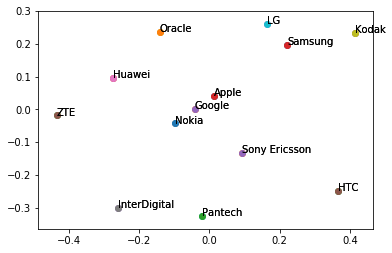

In [32]:
#pos contains the x and y coordinates of each of the companies
x = pos[:,0]
y = pos[:,1]
#we will need matplotlib to generate a scatter plot
import matplotlib.pyplot as plt
for i, j, name in zip(x,y,company_names):
    plt.scatter(i,j)
    plt.text(i,j,name)
plt.show()

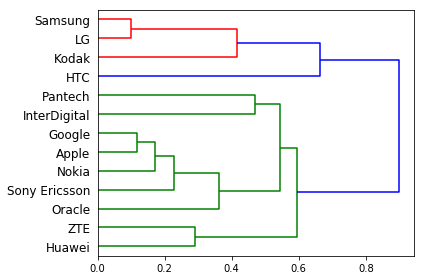

In [36]:
#let us try a hierarchical cluster
import scipy.spatial.distance as ssd #you need this for the statement below
distArray = ssd.squareform(cos_distances) #you get a warning without this
linkages = ward(distArray)
dendrogram(linkages, orientation='right', labels = company_names)
plt.tight_layout()
plt.show()